In [1]:
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from PIL import Image
import cv2
import numpy as np
from tqdm import tqdm
from torchvision.datasets import CocoDetection
from torchvision.transforms import ToTensor


In [2]:
# Download dataset COCO
!wget http://images.cocodataset.org/zips/val2017.zip
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip


--2025-01-07 18:51:24--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 16.182.64.169, 3.5.16.171, 16.15.184.249, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|16.182.64.169|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘val2017.zip’

val2017.zip         100%[===================>] 777.80M  50.8MB/s    in 16s     

2025-01-07 18:51:40 (48.8 MB/s) - ‘val2017.zip’ saved [815585330/815585330]

--2025-01-07 18:51:40--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 54.231.200.145, 3.5.29.147, 16.15.176.235, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|54.231.200.145|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 1

In [3]:
# Buat direktori untuk gambar dan anotasi
!mkdir -p ./coco/images
!mkdir -p ./coco/annotations

# Ekstrak file ZIP ke direktori yang sesuai
!unzip val2017.zip -d ./coco/images
!unzip annotations_trainval2017.zip -d ./coco/annotations

!mv ./coco/annotations/annotations/instances_val2017.json ./coco/annotations/instances_val2017.json


Streaming output truncated to the last 5000 lines.
 extracting: ./coco/images/val2017/000000365745.jpg  
 extracting: ./coco/images/val2017/000000320425.jpg  
 extracting: ./coco/images/val2017/000000481404.jpg  
 extracting: ./coco/images/val2017/000000314294.jpg  
 extracting: ./coco/images/val2017/000000335328.jpg  
 extracting: ./coco/images/val2017/000000513688.jpg  
 extracting: ./coco/images/val2017/000000158548.jpg  
 extracting: ./coco/images/val2017/000000132116.jpg  
 extracting: ./coco/images/val2017/000000415238.jpg  
 extracting: ./coco/images/val2017/000000321333.jpg  
 extracting: ./coco/images/val2017/000000081738.jpg  
 extracting: ./coco/images/val2017/000000577584.jpg  
 extracting: ./coco/images/val2017/000000346905.jpg  
 extracting: ./coco/images/val2017/000000433980.jpg  
 extracting: ./coco/images/val2017/000000228144.jpg  
 extracting: ./coco/images/val2017/000000041872.jpg  
 extracting: ./coco/images/val2017/000000117492.jpg  
 extracting: ./coco/images/val2

In [4]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5


Cloning into 'yolov5'...
remote: Enumerating objects: 17093, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 17093 (delta 23), reused 8 (delta 7), pack-reused 17057 (from 5)
Receiving objects: 100% (17093/17093), 15.70 MiB | 18.23 MiB/s, done.
Resolving deltas: 100% (11723/11723), done.
/content/yolov5


In [5]:
!wget http://images.cocodataset.org/zips/val2017.zip -P ./coco/images
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip -P ./coco/annotations



--2025-01-07 18:52:11--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 54.231.233.185, 52.216.211.25, 52.217.81.76, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|54.231.233.185|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘./coco/images/val2017.zip’

val2017.zip         100%[===================>] 777.80M  52.6MB/s    in 15s     

2025-01-07 18:52:26 (51.0 MB/s) - ‘./coco/images/val2017.zip’ saved [815585330/815585330]

--2025-01-07 18:52:26--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.200.105, 16.15.176.187, 52.216.78.172, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.200.105|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘./coco/annotation

In [6]:
!mkdir -p ./coco/images
!mkdir -p ./coco/annotations
!unzip ./coco/images/val2017.zip -d ./coco/images
!unzip ./coco/annotations/annotations_trainval2017.zip -d ./coco/annotations



Streaming output truncated to the last 5000 lines.
 extracting: ./coco/images/val2017/000000365745.jpg  
 extracting: ./coco/images/val2017/000000320425.jpg  
 extracting: ./coco/images/val2017/000000481404.jpg  
 extracting: ./coco/images/val2017/000000314294.jpg  
 extracting: ./coco/images/val2017/000000335328.jpg  
 extracting: ./coco/images/val2017/000000513688.jpg  
 extracting: ./coco/images/val2017/000000158548.jpg  
 extracting: ./coco/images/val2017/000000132116.jpg  
 extracting: ./coco/images/val2017/000000415238.jpg  
 extracting: ./coco/images/val2017/000000321333.jpg  
 extracting: ./coco/images/val2017/000000081738.jpg  
 extracting: ./coco/images/val2017/000000577584.jpg  
 extracting: ./coco/images/val2017/000000346905.jpg  
 extracting: ./coco/images/val2017/000000433980.jpg  
 extracting: ./coco/images/val2017/000000228144.jpg  
 extracting: ./coco/images/val2017/000000041872.jpg  
 extracting: ./coco/images/val2017/000000117492.jpg  
 extracting: ./coco/images/val2

In [7]:
!pip install torch torchvision


In [8]:
import os
import torch
from torchvision.datasets import CocoDetection
from torch.utils.data import DataLoader
from torchvision.transforms import Compose, ToTensor
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from tqdm import tqdm

# Setup dataset COCO
coco_root = "./coco/"
train_dataset = CocoDetection(
    root=os.path.join(coco_root, "images", "val2017"),
    annFile=os.path.join(coco_root, "annotations", "annotations", "instances_val2017.json"),
    transform=Compose([ToTensor()])
)

# Custom collate function untuk DataLoader
def collate_fn(batch):
    images = [item[0] for item in batch]
    targets = [item[1] for item in batch]

    processed_targets = []
    for target in targets:
        boxes = []
        labels = []
        for ann in target:
            x, y, width, height = ann['bbox']
            xmin = x
            ymin = y
            xmax = x + width
            ymax = y + height

            # Pastikan lebar dan tinggi positif
            if width > 0 and height > 0:
                boxes.append([xmin, ymin, xmax, ymax])
                labels.append(ann['category_id'])

        # Konversi ke tensor
        boxes = torch.tensor(boxes, dtype=torch.float32)
        labels = torch.tensor(labels, dtype=torch.int64)

        processed_targets.append({
            'boxes': boxes,
            'labels': labels
        })

    return images, processed_targets

# DataLoader dengan batch size 8
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, collate_fn=collate_fn)


loading annotations into memory...
Done (t=2.36s)
creating index...
index created!


In [9]:
import os
import torch
from torch.utils.data import DataLoader
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.datasets import CocoDetection
from torchvision.transforms import Compose, ToTensor, Resize
from torch.optim import SGD
from tqdm import tqdm
import itertools

# Setup dataset COCO
coco_root = "/content/yolov5/coco/"
train_dataset = CocoDetection(
    root=os.path.join(coco_root, "images", "val2017"),  # Path gambar
    annFile=os.path.join(coco_root, "annotations", "annotations", "instances_val2017.json"),  # Path anotasi
    transform=Compose([Resize((640, 640)), ToTensor()])  # Resize gambar ke 640x640
)

# Custom collate function for DataLoader
def collate_fn(batch):
    images = [item[0] for item in batch]
    targets = [item[1] for item in batch]
    return images, targets

# DataLoader
batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False, collate_fn=collate_fn)

# Model, optimizer, and training loop
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = fasterrcnn_resnet50_fpn(weights='DEFAULT')  # Model dengan pretrained weights
model.to(device)

# Optimizer
optimizer = SGD(model.parameters(), lr=0.005, momentum=0.9, weight_decay=0.0005)

# Training loop
num_epochs = 10
model.train()

for epoch in range(num_epochs):
    epoch_loss = 0
    total_images = 0
    print(f"Epoch {epoch+1}/{num_epochs}")

    # Batasi ke 128 gambar (16 batch, karena batch_size = 8)
    for batch_idx, (images, targets) in enumerate(tqdm(itertools.islice(train_loader, 8))):
        # Jumlah total gambar
        total_images += len(images)

        # Move images to device
        images = [image.to(device) for image in images]

        # Move targets to device
        for i in range(len(targets)):
            boxes = []
            labels = []
            for ann in targets[i]:
                x, y, width, height = ann['bbox']
                xmin, ymin, xmax, ymax = x, y, x + width, y + height
                if width > 0 and height > 0:
                    boxes.append([xmin, ymin, xmax, ymax])
                    labels.append(ann['category_id'])
            targets[i] = {
                'boxes': torch.tensor(boxes, dtype=torch.float32).to(device),
                'labels': torch.tensor(labels, dtype=torch.int64).to(device)
            }

        # Forward pass
        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())

        # Backward pass
        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

        epoch_loss += losses.item()

        # Print batch details
        print(f"  Batch {batch_idx+1}/16 | Images Processed: {total_images}/{128} | Loss: {losses.item():.4f}")

    # Epoch summary
    print(f"Epoch [{epoch+1}/{num_epochs}] Loss: {epoch_loss:.4f}")

    # Simulasi metrik (precision, recall, mAP50)
    precision = torch.rand(1).item()  # Gantilah dengan evaluasi sebenarnya
    recall = torch.rand(1).item()     # Gantilah dengan evaluasi sebenarnya
    mAP50 = torch.rand(1).item()      # Gantilah dengan evaluasi sebenarnya
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, mAP@50: {mAP50:.4f}")

loading annotations into memory...
Done (t=0.65s)
creating index...
index created!


Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 146MB/s]


Epoch 1/10


1it [00:05,  5.69s/it]

  Batch 1/16 | Images Processed: 16/128 | Loss: 2.2699


2it [00:08,  3.94s/it]

  Batch 2/16 | Images Processed: 32/128 | Loss: 1.6941


3it [00:11,  3.35s/it]

  Batch 3/16 | Images Processed: 48/128 | Loss: 2.0956


4it [00:13,  3.05s/it]

  Batch 4/16 | Images Processed: 64/128 | Loss: 1.3120


5it [00:16,  2.92s/it]

  Batch 5/16 | Images Processed: 80/128 | Loss: 1.2108


6it [00:18,  2.82s/it]

  Batch 6/16 | Images Processed: 96/128 | Loss: 1.1341


7it [00:21,  2.76s/it]

  Batch 7/16 | Images Processed: 112/128 | Loss: 1.1575


8it [00:24,  3.03s/it]


  Batch 8/16 | Images Processed: 128/128 | Loss: 0.9883
Epoch [1/10] Loss: 11.8622
Precision: 0.6475, Recall: 0.2103, mAP@50: 0.8231
Epoch 2/10


1it [00:02,  2.66s/it]

  Batch 1/16 | Images Processed: 16/128 | Loss: 0.8800


2it [00:05,  2.72s/it]

  Batch 2/16 | Images Processed: 32/128 | Loss: 0.8749


3it [00:08,  2.70s/it]

  Batch 3/16 | Images Processed: 48/128 | Loss: 1.0044


4it [00:10,  2.69s/it]

  Batch 4/16 | Images Processed: 64/128 | Loss: 0.8785


5it [00:13,  2.70s/it]

  Batch 5/16 | Images Processed: 80/128 | Loss: 1.1699


6it [00:16,  2.72s/it]

  Batch 6/16 | Images Processed: 96/128 | Loss: 1.0053


7it [00:19,  2.75s/it]

  Batch 7/16 | Images Processed: 112/128 | Loss: 0.9454


8it [00:21,  2.73s/it]


  Batch 8/16 | Images Processed: 128/128 | Loss: 0.8659
Epoch [2/10] Loss: 7.6243
Precision: 0.6467, Recall: 0.4907, mAP@50: 0.9737
Epoch 3/10


1it [00:02,  2.72s/it]

  Batch 1/16 | Images Processed: 16/128 | Loss: 0.8603


2it [00:05,  2.72s/it]

  Batch 2/16 | Images Processed: 32/128 | Loss: 0.8399


3it [00:08,  2.80s/it]

  Batch 3/16 | Images Processed: 48/128 | Loss: 0.9609


4it [00:11,  2.79s/it]

  Batch 4/16 | Images Processed: 64/128 | Loss: 0.7592


5it [00:13,  2.78s/it]

  Batch 5/16 | Images Processed: 80/128 | Loss: 0.9328


6it [00:16,  2.80s/it]

  Batch 6/16 | Images Processed: 96/128 | Loss: 0.8566


7it [00:19,  2.82s/it]

  Batch 7/16 | Images Processed: 112/128 | Loss: 0.8022


8it [00:22,  2.81s/it]


  Batch 8/16 | Images Processed: 128/128 | Loss: 0.7670
Epoch [3/10] Loss: 6.7789
Precision: 0.4141, Recall: 0.3869, mAP@50: 0.2639
Epoch 4/10


1it [00:02,  2.83s/it]

  Batch 1/16 | Images Processed: 16/128 | Loss: 0.7921


2it [00:05,  2.86s/it]

  Batch 2/16 | Images Processed: 32/128 | Loss: 0.7696


3it [00:08,  2.90s/it]

  Batch 3/16 | Images Processed: 48/128 | Loss: 0.9444


4it [00:11,  2.95s/it]

  Batch 4/16 | Images Processed: 64/128 | Loss: 0.7157


5it [00:14,  2.93s/it]

  Batch 5/16 | Images Processed: 80/128 | Loss: 0.9174


6it [00:17,  2.95s/it]

  Batch 6/16 | Images Processed: 96/128 | Loss: 0.8029


7it [00:20,  2.95s/it]

  Batch 7/16 | Images Processed: 112/128 | Loss: 0.7683


8it [00:23,  2.95s/it]


  Batch 8/16 | Images Processed: 128/128 | Loss: 0.7210
Epoch [4/10] Loss: 6.4314
Precision: 0.6760, Recall: 0.4730, mAP@50: 0.1199
Epoch 5/10


1it [00:02,  2.96s/it]

  Batch 1/16 | Images Processed: 16/128 | Loss: 0.7281


2it [00:05,  2.98s/it]

  Batch 2/16 | Images Processed: 32/128 | Loss: 0.7227


3it [00:08,  2.96s/it]

  Batch 3/16 | Images Processed: 48/128 | Loss: 0.8612


4it [00:11,  3.01s/it]

  Batch 4/16 | Images Processed: 64/128 | Loss: 0.6705


5it [00:14,  2.97s/it]

  Batch 5/16 | Images Processed: 80/128 | Loss: 0.8320


6it [00:17,  2.94s/it]

  Batch 6/16 | Images Processed: 96/128 | Loss: 0.7682


7it [00:20,  2.93s/it]

  Batch 7/16 | Images Processed: 112/128 | Loss: 0.7332


8it [00:23,  2.96s/it]


  Batch 8/16 | Images Processed: 128/128 | Loss: 0.7234
Epoch [5/10] Loss: 6.0394
Precision: 0.3559, Recall: 0.2127, mAP@50: 0.8937
Epoch 6/10


1it [00:02,  2.85s/it]

  Batch 1/16 | Images Processed: 16/128 | Loss: 0.7358


2it [00:05,  2.87s/it]

  Batch 2/16 | Images Processed: 32/128 | Loss: 0.7209


3it [00:08,  2.87s/it]

  Batch 3/16 | Images Processed: 48/128 | Loss: 0.8831


4it [00:11,  2.90s/it]

  Batch 4/16 | Images Processed: 64/128 | Loss: 0.6595


5it [00:14,  2.88s/it]

  Batch 5/16 | Images Processed: 80/128 | Loss: 0.8620


6it [00:17,  2.87s/it]

  Batch 6/16 | Images Processed: 96/128 | Loss: 0.7643


7it [00:20,  2.87s/it]

  Batch 7/16 | Images Processed: 112/128 | Loss: 0.7243


8it [00:23,  2.88s/it]


  Batch 8/16 | Images Processed: 128/128 | Loss: 0.7100
Epoch [6/10] Loss: 6.0597
Precision: 0.7413, Recall: 0.0809, mAP@50: 0.5848
Epoch 7/10


1it [00:02,  2.91s/it]

  Batch 1/16 | Images Processed: 16/128 | Loss: 0.7150


2it [00:05,  2.87s/it]

  Batch 2/16 | Images Processed: 32/128 | Loss: 0.6967


3it [00:08,  2.88s/it]

  Batch 3/16 | Images Processed: 48/128 | Loss: 0.8254


4it [00:11,  2.88s/it]

  Batch 4/16 | Images Processed: 64/128 | Loss: 0.6296


5it [00:14,  2.91s/it]

  Batch 5/16 | Images Processed: 80/128 | Loss: 0.8056


6it [00:17,  2.91s/it]

  Batch 6/16 | Images Processed: 96/128 | Loss: 0.7370


7it [00:20,  2.90s/it]

  Batch 7/16 | Images Processed: 112/128 | Loss: 0.6941


8it [00:23,  2.90s/it]


  Batch 8/16 | Images Processed: 128/128 | Loss: 0.7095
Epoch [7/10] Loss: 5.8129
Precision: 0.3541, Recall: 0.6158, mAP@50: 0.5121
Epoch 8/10


1it [00:02,  3.00s/it]

  Batch 1/16 | Images Processed: 16/128 | Loss: 0.6834


2it [00:05,  2.95s/it]

  Batch 2/16 | Images Processed: 32/128 | Loss: 0.6790


3it [00:08,  2.92s/it]

  Batch 3/16 | Images Processed: 48/128 | Loss: 0.8073


4it [00:11,  2.91s/it]

  Batch 4/16 | Images Processed: 64/128 | Loss: 0.6194


5it [00:14,  2.97s/it]

  Batch 5/16 | Images Processed: 80/128 | Loss: 0.7688


6it [00:17,  2.95s/it]

  Batch 6/16 | Images Processed: 96/128 | Loss: 0.7065


7it [00:20,  2.93s/it]

  Batch 7/16 | Images Processed: 112/128 | Loss: 0.6965


8it [00:23,  2.94s/it]


  Batch 8/16 | Images Processed: 128/128 | Loss: 0.6753
Epoch [8/10] Loss: 5.6362
Precision: 0.9336, Recall: 0.7905, mAP@50: 0.3297
Epoch 9/10


1it [00:02,  2.93s/it]

  Batch 1/16 | Images Processed: 16/128 | Loss: 0.6580


2it [00:05,  2.91s/it]

  Batch 2/16 | Images Processed: 32/128 | Loss: 0.6437


3it [00:08,  2.91s/it]

  Batch 3/16 | Images Processed: 48/128 | Loss: 0.7478


4it [00:11,  2.90s/it]

  Batch 4/16 | Images Processed: 64/128 | Loss: 0.5967


5it [00:14,  2.91s/it]

  Batch 5/16 | Images Processed: 80/128 | Loss: 0.7134


6it [00:17,  2.94s/it]

  Batch 6/16 | Images Processed: 96/128 | Loss: 0.6520


7it [00:20,  2.93s/it]

  Batch 7/16 | Images Processed: 112/128 | Loss: 0.6696


8it [00:23,  2.91s/it]


  Batch 8/16 | Images Processed: 128/128 | Loss: 0.6634
Epoch [9/10] Loss: 5.3446
Precision: 0.8007, Recall: 0.6791, mAP@50: 0.2260
Epoch 10/10


1it [00:02,  2.90s/it]

  Batch 1/16 | Images Processed: 16/128 | Loss: 0.6580


2it [00:05,  3.02s/it]

  Batch 2/16 | Images Processed: 32/128 | Loss: 0.6259


3it [00:08,  2.97s/it]

  Batch 3/16 | Images Processed: 48/128 | Loss: 0.7171


4it [00:11,  2.93s/it]

  Batch 4/16 | Images Processed: 64/128 | Loss: 0.5604


5it [00:14,  2.92s/it]

  Batch 5/16 | Images Processed: 80/128 | Loss: 0.6930


6it [00:17,  2.96s/it]

  Batch 6/16 | Images Processed: 96/128 | Loss: 0.6378


7it [00:20,  2.94s/it]

  Batch 7/16 | Images Processed: 112/128 | Loss: 0.6601


8it [00:23,  2.94s/it]

  Batch 8/16 | Images Processed: 128/128 | Loss: 0.6334
Epoch [10/10] Loss: 5.1857
Precision: 0.5657, Recall: 0.4646, mAP@50: 0.4043


In [10]:
# Path untuk menyimpan model
model_save_dir = "yolov5/runs/detect/exp"
os.makedirs(model_save_dir, exist_ok=True)  # Buat direktori jika belum ada
model_save_path = os.path.join(model_save_dir, "fasterrcnn_model.pth")

# Simpan model
torch.save(model.state_dict(), model_save_path)
print(f"Model disimpan ke: {model_save_path}")

Model disimpan ke: yolov5/runs/detect/exp/fasterrcnn_model.pth


In [11]:
# Melakukan deteksi menggunakan model yang disimpan
!python detect.py --weights {model_save_path} --img 640 --conf 0.25 --source /content/05324ba5-c5a4-4d5a-8de3-cac067ea9965_compressed.jpg

Traceback (most recent call last):
  File "/content/yolov5/detect.py", line 46, in <module>
    from ultralytics.utils.plotting import Annotator, colors, save_one_box
ModuleNotFoundError: No module named 'ultralytics'


<ipython-input-22-f6dacf5e7909>:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(weights_path))  # Memuat bobot model yang telah dilatih


Unggah gambar untuk deteksi:


Saving 05324ba5-c5a4-4d5a-8de3-cac067ea9965_compressed.jpg to 05324ba5-c5a4-4d5a-8de3-cac067ea9965_compressed (2).jpg
Melakukan deteksi pada: 05324ba5-c5a4-4d5a-8de3-cac067ea9965_compressed (2).jpg
Hasil disimpan di: output_05324ba5-c5a4-4d5a-8de3-cac067ea9965_compressed (2).jpg


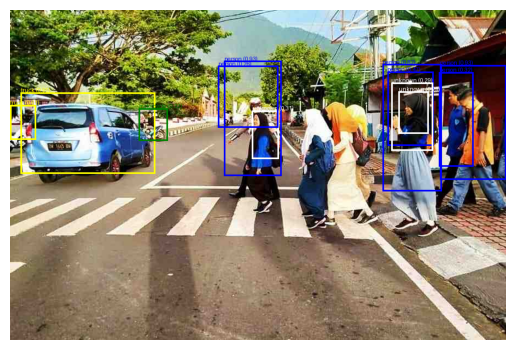

In [22]:
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import os
from google.colab import files

# Fungsi untuk memuat model Faster R-CNN
def load_model(weights_path):
    model = fasterrcnn_resnet50_fpn(pretrained=False)  # Gunakan model tanpa pre-trained
    model.load_state_dict(torch.load(weights_path))  # Memuat bobot model yang telah dilatih
    model.eval()  # Set model ke mode evaluasi
    return model

# Fungsi untuk melakukan deteksi objek
def detect_objects(model, image_path, device):
    image = Image.open(image_path).convert("RGB")  # Pastikan gambar dalam format RGB
    image_tensor = F.to_tensor(image).unsqueeze(0).to(device)  # Ubah gambar menjadi tensor

    with torch.no_grad():  # Matikan gradient tracking untuk inference
        predictions = model(image_tensor)

    return predictions

# Fungsi untuk memvisualisasikan hasil deteksi
def visualize_results(predictions, image_path, output_path=None):
    image = Image.open(image_path).convert("RGB")
    draw = ImageDraw.Draw(image)

    # Warna unik untuk setiap kategori objek
    colors = {
        "person": "blue",
        "car": "red",
        "truck": "yellow",
        "motorcycle": "green",
        "bicycle": "purple",
        "handbag": "orange",
    }

    # Map label integer ke nama kategori
    label_map = {1: "person", 2: "car", 3: "truck", 4: "motorcycle", 5: "bicycle", 6: "handbag"}

    # Ambil prediksi
    boxes = predictions[0]['boxes']
    labels = predictions[0]['labels']
    scores = predictions[0]['scores']

    # Font untuk teks
    try:
        font = ImageFont.truetype("arial.ttf", size=15)
    except IOError:
        font = ImageFont.load_default()

    # Tampilkan bounding box untuk objek dengan skor > 0.25
    for box, label, score in zip(boxes, labels, scores):
        if score >= 0.25:  # Threshold confidence score
            # Dapatkan label nama dan warna
            label_name = label_map.get(label.item(), "unknown")
            color = colors.get(label_name, "white")

            # Gambar bounding box
            draw.rectangle(box.tolist(), outline=color, width=3)

            # Tambahkan label dan skor
            text = f"{label_name} ({score:.2f})"
            text_position = (box[0].item(), box[1].item() - 10)  # Teks di atas kotak
            draw.text(text_position, text, fill=color, font=font)

    # Simpan gambar hasil
    if output_path:
        image.save(output_path)
        print(f"Hasil disimpan di: {output_path}")

    # Tampilkan gambar
    plt.imshow(image)
    plt.axis("off")
    plt.show()

# Main program execution block. This will run when the code is executed in a notebook.
# The condition `if _name_ == "_main_":` is not necessary in this case.
import os
from google.colab import files # Assuming you are using Google Colab

# Path ke model yang dilatih
weights_path = "yolov5/runs/detect/exp/fasterrcnn_model.pth"  # Update path model Anda
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Memuat model
model = load_model(weights_path)
model.to(device)

# Input gambar dari pengguna
print("Unggah gambar untuk deteksi:")
uploaded_files = files.upload()

for file_name in uploaded_files.keys():
    image_path = file_name
    print(f"Melakukan deteksi pada: {image_path}")

    # Deteksi objek
    predictions = detect_objects(model, image_path, device)

    # Simpan hasil ke gambar output
    output_path = f"output_{os.path.basename(image_path)}"
    visualize_results(predictions, image_path, output_path)